<a href="https://colab.research.google.com/github/rutujapalatkar27/upgraded-octo-invention/blob/main/Starter_Code_Loan_Approval_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

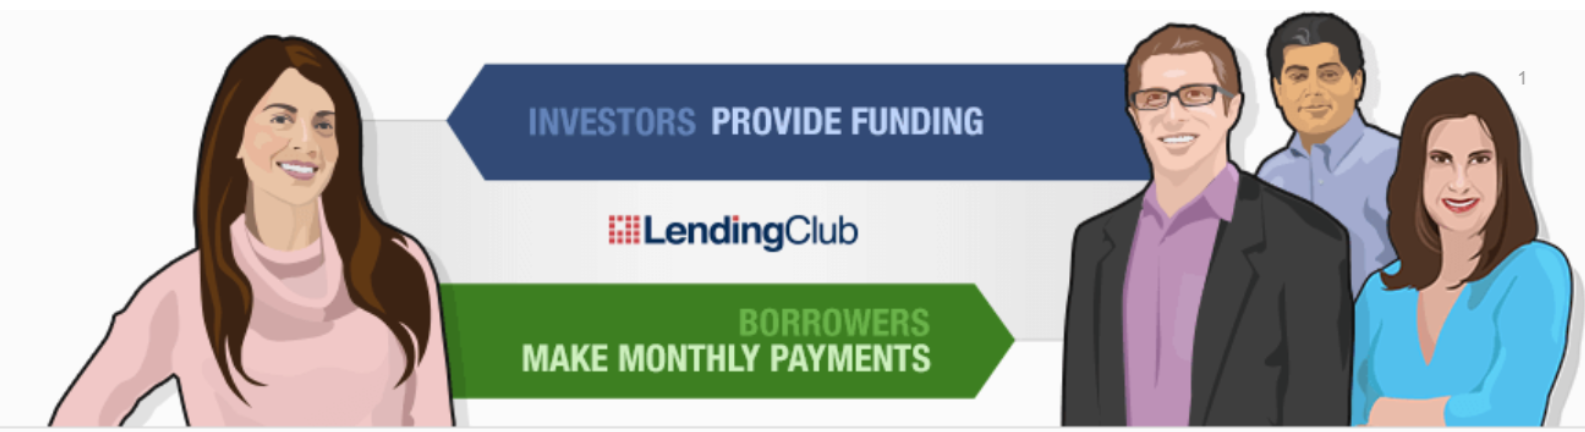

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [476]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [477]:
## Load the dataset
loan_data = pd.read_csv('loans.csv')


In [478]:
## Observe the first few rows
## Do you observe any issues?
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [479]:
## Check the dataframe structure - datatypes and number of non-null rows
loan_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [480]:
## Check the shape
loan_data.shape

(38770, 23)

In [481]:
# Filter and print rows with missing values
missing_rows = loan_data[loan_data.isnull().any(axis=1)]
print(missing_rows)

            id  member_id  loan_amnt        term int_rate  installment grade  \
162    1067644  1302032.0     2500.0   36 months    7.51%        77.78     A   
312    1058717  1290516.0    18000.0   60 months   17.58%       452.98     D   
376    1064582  1298394.0     4000.0   36 months   11.71%       132.31     B   
403    1064366  1298164.0     1000.0   36 months   14.65%        34.50     C   
419    1063912  1296491.0     8250.0   36 months    7.51%       256.67     A   
...        ...        ...        ...         ...      ...          ...   ...   
37577   352047   354931.0     5600.0   36 months   10.64%       182.39     B   
37952   306018   305720.0      700.0   36 months   12.29%        23.35     C   
37970   300383   300380.0     8000.0   36 months   11.34%       263.20     C   
38002   294803   294798.0     1600.0   36 months   11.03%        52.41     C   
38023   290803   290796.0     3000.0   36 months   11.34%        98.70     C   

      sub_grade emp_length home_ownersh

In [482]:
## Check the missing values across the columns
loan_data.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


#### Observations

- Document your observations

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [483]:
## Write your code
loan_data['emp_length'] = loan_data['emp_length'].replace({'10+ years': 10, '< 1 year': 0, 'n/a': np.nan})
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'], errors='coerce') # Convert to numeric, handling errors
loan_data.dropna(subset=['emp_length','revol_util'],inplace=True)


In [484]:
## Write your code
loan_data.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


In [485]:
## Write your code
loan_data.shape

(13061, 23)

In [486]:
## Write your code
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13061 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13061 non-null  int64  
 1   member_id            13061 non-null  float64
 2   loan_amnt            13061 non-null  float64
 3   term                 13061 non-null  object 
 4   int_rate             13061 non-null  object 
 5   installment          13061 non-null  float64
 6   grade                13061 non-null  object 
 7   sub_grade            13061 non-null  object 
 8   emp_length           13061 non-null  float64
 9   home_ownership       13061 non-null  object 
 10  annual_inc           13061 non-null  float64
 11  verification_status  13061 non-null  object 
 12  purpose              13061 non-null  object 
 13  dti                  13061 non-null  float64
 14  delinq_2yrs          13061 non-null  float64
 15  inq_last_6mths       13061 non-null  floa

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [487]:
## Drop the above columns
loan_data.drop(columns=['id','member_id', 'installment','last_pymnt_amnt'], inplace=True)

In [488]:
## Check the dataframe again
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13061 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            13061 non-null  float64
 1   term                 13061 non-null  object 
 2   int_rate             13061 non-null  object 
 3   grade                13061 non-null  object 
 4   sub_grade            13061 non-null  object 
 5   emp_length           13061 non-null  float64
 6   home_ownership       13061 non-null  object 
 7   annual_inc           13061 non-null  float64
 8   verification_status  13061 non-null  object 
 9   purpose              13061 non-null  object 
 10  dti                  13061 non-null  float64
 11  delinq_2yrs          13061 non-null  float64
 12  inq_last_6mths       13061 non-null  float64
 13  open_acc             13061 non-null  float64
 14  pub_rec              13061 non-null  float64
 15  revol_bal            13061 non-null  floa

Perform any additional data preparation steps if needed

In [489]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36 months,10.65%,B,B2,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,Fully Paid
1,2500.0,60 months,15.27%,C,C4,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,Charged Off
2,2400.0,36 months,15.96%,C,C5,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,Fully Paid
3,10000.0,36 months,13.49%,C,C1,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,Fully Paid
8,5375.0,60 months,12.69%,B,B5,0.0,RENT,15000.0,Verified,other,18.08,0.0,0.0,2.0,0.0,9279.0,36.5%,3.0,Charged Off


In [490]:
# ## Write the code

# Convert to string first, then strip the % sign and convert to float
loan_data['int_rate'] = loan_data['int_rate'].astype(str).str.rstrip('%').astype(float)


loan_data['revol_util'] = loan_data['revol_util'].astype(str).str.rstrip('%').astype(float)

loan_data.isnull().sum()


,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
purpose,0


In [491]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36 months,10.65,B,B2,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60 months,15.27,C,C4,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36 months,15.96,C,C5,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36 months,13.49,C,C1,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid
8,5375.0,60 months,12.69,B,B5,0.0,RENT,15000.0,Verified,other,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,Charged Off


In [492]:
## Write the code
loan_data['int_rate']

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
8,12.69
...,...
38759,8.07
38762,11.22
38767,8.07
38768,7.43


### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

count          13061
unique             2
top       Fully Paid
freq           11093
Name: loan_status, dtype: object


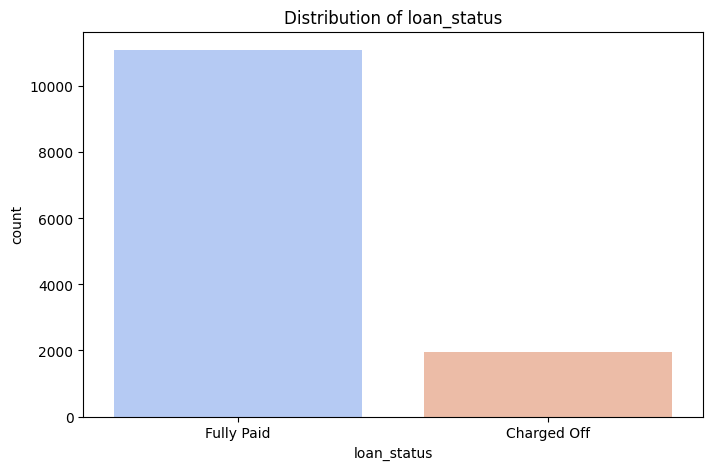

loan_status
Fully Paid     84.932241
Charged Off    15.067759
Name: proportion, dtype: float64


In [493]:
## Write Code here
print(loan_data['loan_status'].describe())


plt.figure(figsize=(8, 5))
sns.countplot(x=loan_data['loan_status'], order=loan_data['loan_status'].value_counts().index, palette="coolwarm")
plt.title("Distribution of loan_status")
plt.show()

print(loan_data['loan_status'].value_counts(normalize=True) * 100)  # Percentage distribution


This shows how many loans were fully paid, charged off, or in default.

85% were fully paid and 14% were charged off

count          13061
unique             2
top        36 months
freq            9506
Name: term, dtype: object


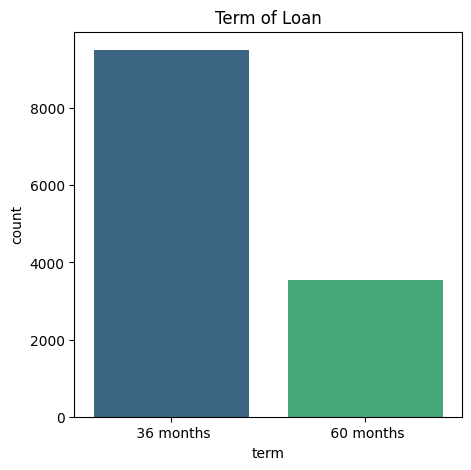

term
36 months    72.781563
60 months    27.218437
Name: proportion, dtype: float64


In [494]:
## Write Code here
print(loan_data['term'].describe())

##Histogram
plt.figure(figsize=(5, 5))
sns.countplot(x=loan_data['term'], palette='viridis')
plt.title('Term of Loan')
plt.show()

print(loan_data['term'].value_counts(normalize=True) * 100)



Observation:

Most loans are either 36 months (3 years) or 60 months (5 years).

Identifies preferred loan durations.

count     13061
unique        7
top           B
freq       3834
Name: grade, dtype: object


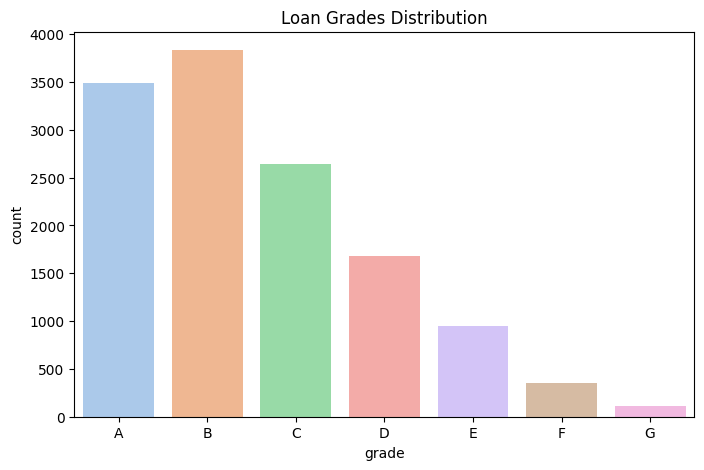

grade
B    3834
A    3489
C    2643
D    1680
E     953
F     350
G     112
Name: count, dtype: int64


In [495]:
## Write Code here
print(loan_data['grade'].describe())

plt.figure(figsize=(8, 5))
sns.countplot(x=loan_data['grade'], order=sorted(loan_data['grade'].unique()), palette="pastel")
plt.title("Loan Grades Distribution")
plt.show()

print(loan_data['grade'].value_counts())


Observation:

Loan grades range from A to G, where A represents lower risk and G represents high risk.

Most loans are in grades B, A, and C.

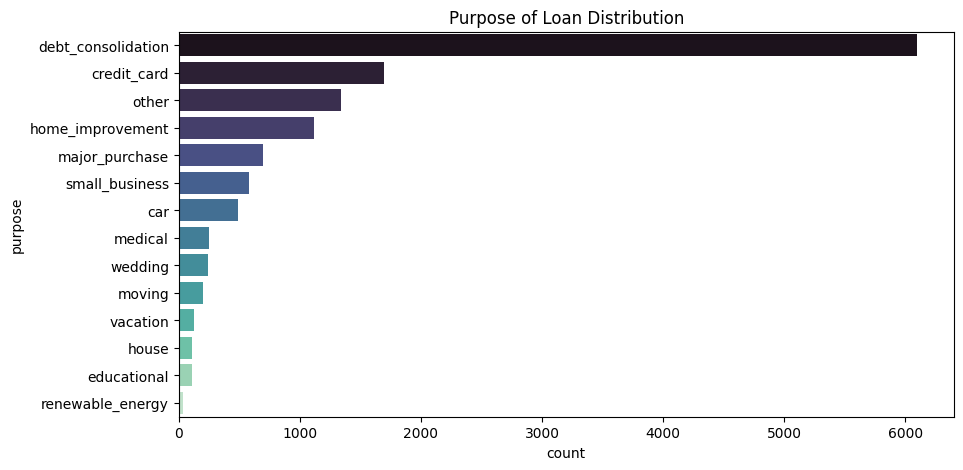

purpose
debt_consolidation    6096
credit_card           1694
other                 1337
home_improvement      1113
major_purchase         692
small_business         576
car                    487
medical                246
wedding                240
moving                 201
vacation               126
house                  112
educational            108
renewable_energy        33
Name: count, dtype: int64


In [496]:
## Write Code here

plt.figure(figsize=(10, 5))
sns.countplot(y=loan_data['purpose'], order=loan_data['purpose'].value_counts().index, palette="mako")
plt.title("Purpose of Loan Distribution")
plt.show()

print(loan_data['purpose'].value_counts())



Observation:

Loans are mostly taken for debt consolidation, credit card repayment and others.

Some niche categories like educational or renewable energy.

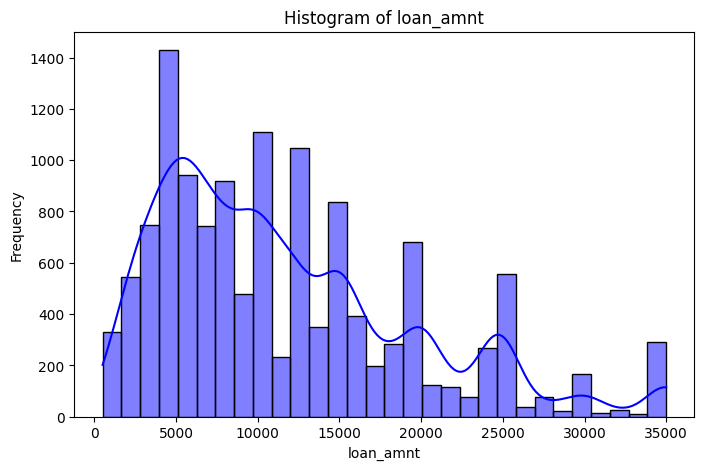

count    13061.000000
mean     11722.276242
std       7829.473088
min        500.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [497]:
## Write Code here

##Histogram
plt.figure(figsize=(8, 5))
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Histogram of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')
plt.show()


print(loan_data['loan_amnt'].describe())


Observation:

Most loans are between $10,000 and $15,000

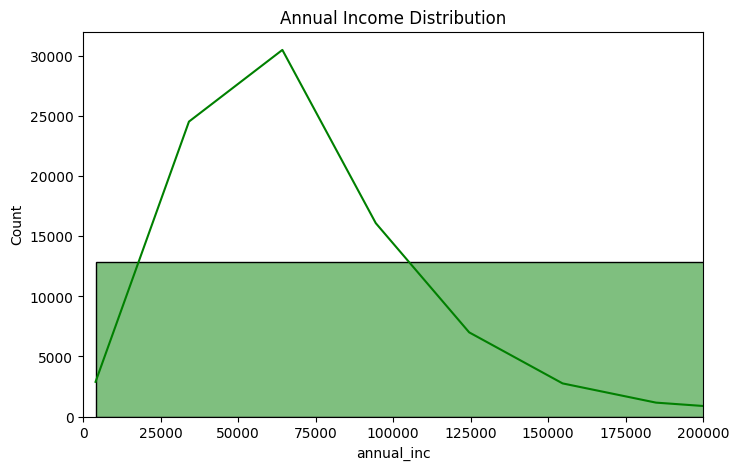

count    1.306100e+04
mean     7.440572e+04
std      7.813143e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      9.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [498]:
plt.figure(figsize=(8, 5))
sns.histplot(loan_data['annual_inc'], bins=30, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.xlim(0, 200000)  # Limiting x-axis to remove extreme values
plt.show()

print(loan_data['annual_inc'].describe())


Most borrowers earn between 40,000 and 83,000

Some extremely high-income values (possible outliers).

**Observations**

- Document your observations here

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

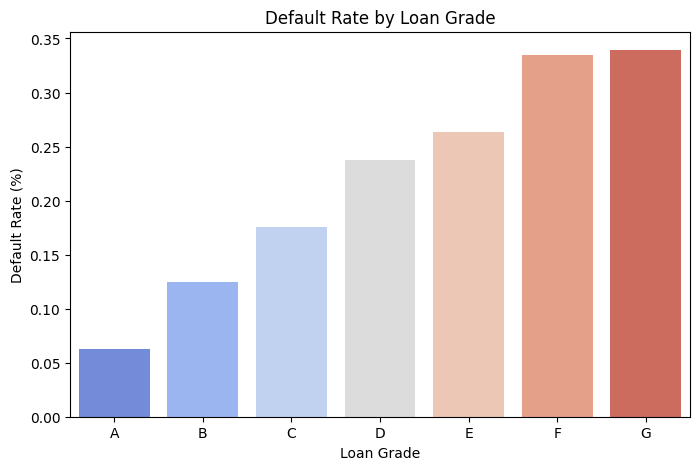

In [499]:
#Write your code here
plt.figure(figsize=(8, 5))
loan_data['default'] = loan_data['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)  # Create default indicator
default_rate = loan_data.groupby('grade')['default'].mean().sort_index()

sns.barplot(x=default_rate.index, y=default_rate.values, palette="coolwarm")
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Rate (%)")
plt.xlabel("Loan Grade")
plt.show()


Higher loan grades (A, B) have lower default rates, while lower grades (D, E, F) have higher risk.

Borrowers with poor credit grades default more frequently.

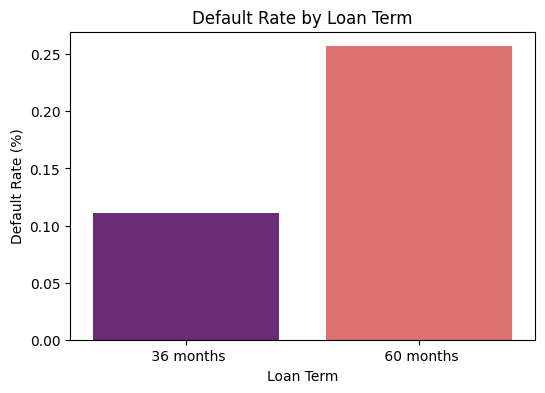

In [500]:
#Write your code here
plt.figure(figsize=(6, 4))
default_rate = loan_data.groupby('term')['default'].mean()

sns.barplot(x=default_rate.index, y=default_rate.values, palette="magma")
plt.title("Default Rate by Loan Term")
plt.ylabel("Default Rate (%)")
plt.xlabel("Loan Term")
plt.show()


Longer loan terms (60 months) have higher default rates than 36-month loans, indicating higher risk for long-duration loans.

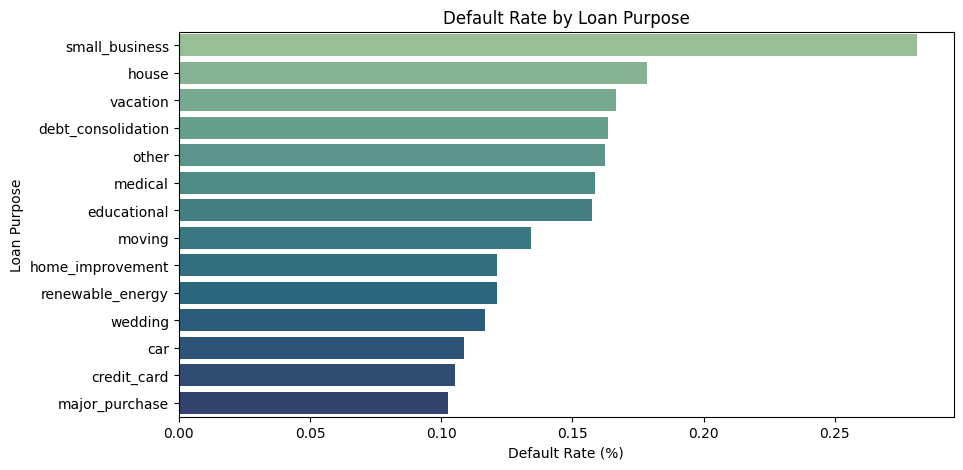

In [501]:
#Write your code here
plt.figure(figsize=(10, 5))
default_rate = loan_data.groupby('purpose')['default'].mean().sort_values(ascending=False)

sns.barplot(y=default_rate.index, x=default_rate.values, palette="crest")
plt.title("Default Rate by Loan Purpose")
plt.xlabel("Default Rate (%)")
plt.ylabel("Loan Purpose")
plt.show()


Small business loans and renewable_energy have higher default rates.

Loans taken for wedding and major_purchase show relatively lower default rates.



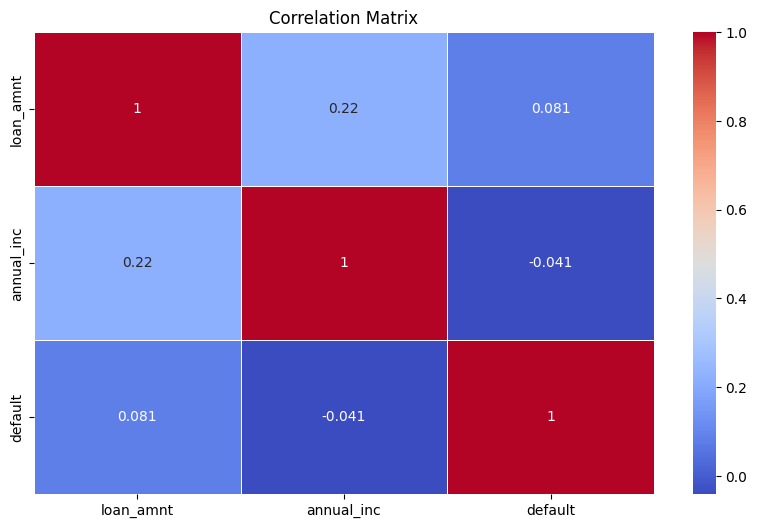

In [502]:
#Write your code here
plt.figure(figsize=(10, 6))
corr_matrix = loan_data[['loan_amnt', 'annual_inc', 'default']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Loan amount and default rate have a weak positive correlation, meaning larger loans may slightly increase the risk of default.

Annual income and default rate have a weak negative correlation, suggesting higher-income borrowers default less frequently.

Key Insights from Bivariate Analysis
Loan Grade & Default → Higher grades (A, B) have lower default rates, while lower grades (D, E, F) have higher risks.

Loan Term & Default → Longer-term loans (60 months) have higher default rates.

Loan Purpose & Default → small business and renewable energy loans default more often.

Correlation Matrix →

Higher loan amounts slightly increase default risk.

Higher income reduces default probability.

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [503]:
# Write code here
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# One-Hot Encoding for categorical variables
loan_data = pd.get_dummies(loan_data, columns=['term', 'home_ownership', 'verification_status','purpose'], drop_first=True)


In [504]:
print(loan_data.head())

   loan_amnt  int_rate grade sub_grade  emp_length  annual_inc    dti  \
0     5000.0     10.65     B        B2        10.0     24000.0  27.65   
1     2500.0     15.27     C        C4         0.0     30000.0   1.00   
2     2400.0     15.96     C        C5        10.0     12252.0   8.72   
3    10000.0     13.49     C        C1        10.0     49200.0  20.00   
8     5375.0     12.69     B        B5         0.0     15000.0  18.08   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             5.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
8          0.0             0.0       2.0      0.0     9279.0        36.5   

   total_acc  loan_status  default  term_ 60 months  home_ownership_NONE  \
0        9.0   Fully Paid   

In [505]:
# Write code here
print(loan_data[['grade', 'sub_grade', 'loan_status']].head())

  grade sub_grade  loan_status
0     B        B2   Fully Paid
1     C        C4  Charged Off
2     C        C5   Fully Paid
3     C        C1   Fully Paid
8     B        B5  Charged Off


In [537]:
# Write code here
label_encoders = {}
for col in ['grade', 'sub_grade', 'loan_status']:  # Replace with your ordinal columns
    le = LabelEncoder()
    loan_data[col] = le.fit_transform(loan_data[col])
    label_encoders[col] = le  # Save encoder for later use (if needed)

In [538]:
for col in label_encoders:
    print(f"Mapping for {col}:")
    print(dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))))
    print("\n")


Mapping for grade:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6)}


Mapping for sub_grade:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64

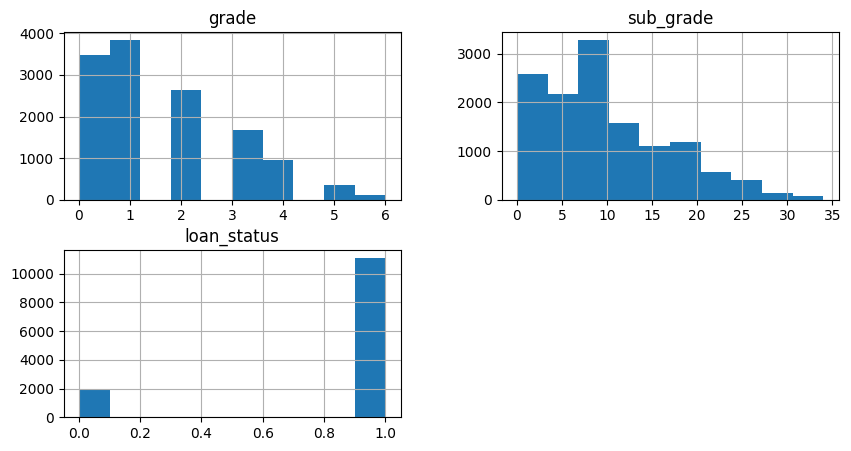

In [508]:
loan_data[['grade', 'sub_grade', 'loan_status']].hist(figsize=(10, 5))
plt.show()


In [509]:
# Write code here
print(loan_data[['grade', 'sub_grade', 'loan_status']].head())


   grade  sub_grade  loan_status
0      1          6            1
1      2         13            0
2      2         14            1
3      2         10            1
8      1          9            0


**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [510]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [511]:
## Write code
print("Class Distribution Before SMOTE:", Counter(loan_data['loan_status']))

Class Distribution Before SMOTE: Counter({1: 11093, 0: 1968})


In [536]:
## Write code
# Separate features and target variable
X = loan_data.drop(columns=['loan_status'], axis=1)  # Features
y = loan_data['loan_status']  # Target variable

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
loan_data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
loan_data_resampled['loan_status'] = y_resampled


In [513]:
## Check the distribution of class in the newly resampled data
print("Class Distribution After SMOTE:", Counter(y_resampled))

Class Distribution After SMOTE: Counter({1: 11093, 0: 11093})


In [514]:
print("Original Data Shape:", loan_data.shape)
print("Resampled Data Shape:", loan_data_resampled.shape)

Original Data Shape: (13061, 36)
Resampled Data Shape: (22186, 36)


**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [534]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X = loan_data_resampled.drop(columns=['loan_status'])  # Features (Independent Variables)
y = loan_data_resampled['loan_status']  # Target Variable (Dependent Variable)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [535]:
## Check the samples
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (17748, 35) (17748,)
Testing Data Shape: (4438, 35) (4438,)


**Scaling**

In [529]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler
scaler = MinMaxScaler()
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



In [530]:
print(X_train.describe())  # Check if values are between 0 and 1
print(X_test.describe())   # Ensure consistency in test data

          loan_amnt      int_rate         grade     sub_grade    emp_length  \
count  17748.000000  17748.000000  17748.000000  17748.000000  17748.000000   
mean       0.342584      0.396178      0.280304      0.325878      0.659925   
std        0.234075      0.198838      0.223360      0.199521      0.443676   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.159420      0.267171      0.166667      0.176471      0.000000   
50%        0.275362      0.393186      0.166667      0.294118      1.000000   
75%        0.478261      0.532720      0.500000      0.470588      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  17748.000000  17748.000000  17748.000000    17748.000000  17748.000000   
mean       0.011245      0.454074      0.018610        0.121257      0.180399   
std        0.011870      0.210532      0.0551

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [531]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [532]:
## Build the model
## Check its evaluation metrics
log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg = LogisticRegression(penalty='l2', C=0.1)  # C is the inverse of regularization strength
log_reg.fit(X_train, y_train)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print Evaluation Metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2199
           1       1.00      1.00      1.00      2239

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



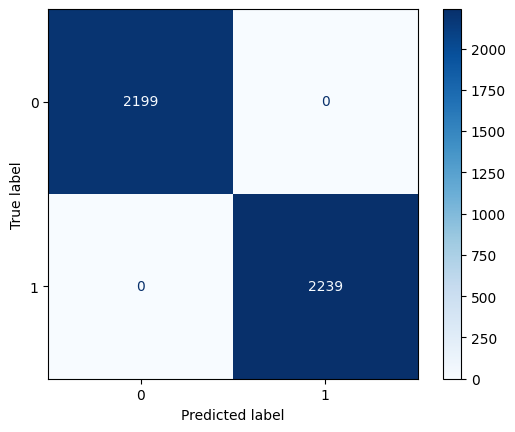

In [521]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

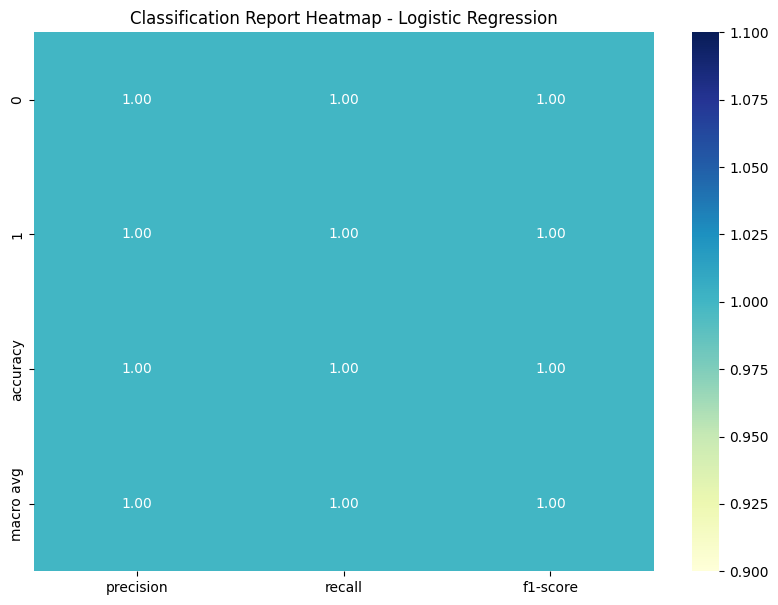

In [522]:
from sklearn.metrics import classification_report
## Plot the classification report
# Compute the Classification Report for Logistic Regression model
report = classification_report(y_test, log_reg.predict(X_test), output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap of the classification report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Classification Report Heatmap - Logistic Regression')
plt.show()


In [523]:
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")


Training Accuracy: 1.00
Test Accuracy: 1.00


Observations

- Document your observations

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Good work completing all the steps till now!
Now, go ahead and summarize your entire work and findings below:

-

-

-

In [524]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [525]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_dt = dt_model.predict(X_test)


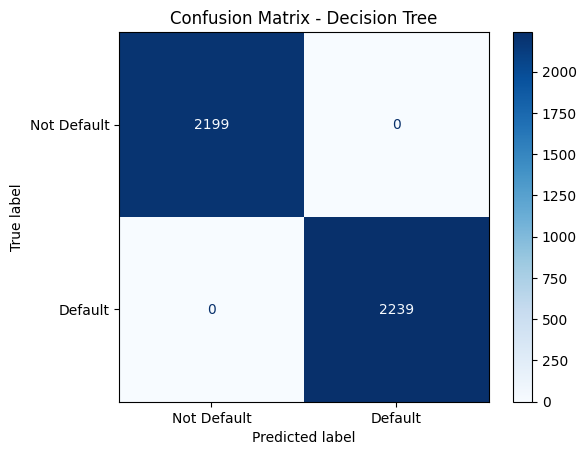

In [526]:
# Compute Confusion Matrix for Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Default', 'Default'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


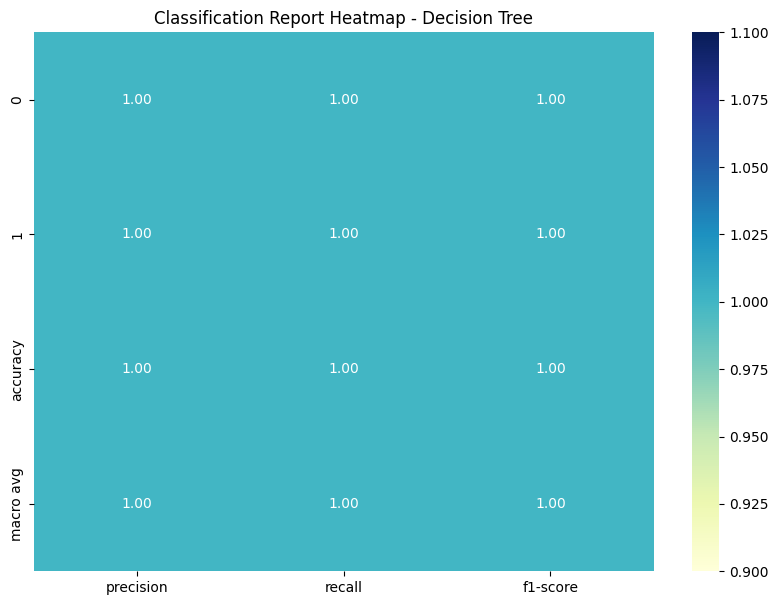

In [527]:
# Compute the Classification Report for Decision Tree model
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Convert the report to DataFrame
report_df_dt = pd.DataFrame(report_dt).transpose()

# Plot the heatmap of the classification report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df_dt.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Classification Report Heatmap - Decision Tree')
plt.show()


---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.